In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings

filterwarnings("ignore")

In [147]:
df = pd.read_csv("/content/Bengaluru_House_Data.csv")


In [148]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [150]:
null = df.isnull().sum()
null_ratio = null / df.shape[0]
pd.DataFrame({"Null": null, "Null_ratio": null_ratio}).T

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
Null,0.0,0.0,1.000000,16.000000,5502.000000,0.0,73.00000,609.000000,0.0
Null_ratio,0.0,0.0,0.000075,0.001201,0.413063,0.0,0.00548,0.045721,0.0


In [151]:
df.dropna(subset=["bath"], inplace=True)

In [152]:
df.dropna(subset=["location"], inplace=True)

In [153]:
df.drop(["society"], axis=1, inplace=True)


In [154]:
df["balcony"].fillna(df["balcony"].mode()[0], inplace=True)


In [155]:
null = df.isnull().sum()
null_ratio = null / df.shape[0]
pd.DataFrame({"Null": null, "Null_ratio": null_ratio}).T

,area_type,availability,location,size,total_sqft,bath,balcony,price
Null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Null_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
pd.DataFrame({"Dtypes": df.dtypes, "Num_Uniq": df.nunique()}).T

,area_type,availability,location,size,total_sqft,bath,balcony,price
Dtypes,object,object,object,object,object,float64,float64,float64
Num_Uniq,4,80,1304,31,2067,19,4,1955


In [157]:
def convert_to_numeric(value):
    try:
        if '-' in str(value):
            low, high = map(float, value.split('-'))
            return (low + high) / 2
        else:
            return float(value)
    except:
        return np.nan

df['total_sqft'] = df['total_sqft'].apply(convert_to_numeric)

missing_after_conversion = df['total_sqft'].isnull().sum()
print(missing_after_conversion)

46


In [158]:
df.dropna(subset=["total_sqft"], inplace=True)

In [159]:
df['size'] = df['size'].str.split().str[0].astype(int)


In [160]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5,3453.0,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4,3600.0,5.0,2.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,1141.0,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4,4689.0,4.0,1.0,488.00


In [161]:
cols_to_change = ["area_type","availability","location"]
df[cols_to_change] = df[cols_to_change].astype("category")

In [162]:
pd.DataFrame({"Dtypes": df.dtypes, "Num_Uniq": df.nunique()}).T

,area_type,availability,location,size,total_sqft,bath,balcony,price
Dtypes,category,category,category,int64,float64,float64,float64,float64
Num_Uniq,4,80,1298,19,1972,19,4,1952


In [163]:
null = df.isnull().sum()
null_ratio = null / df.shape[0]
pd.DataFrame({"Null": null, "Null_ratio": null_ratio}).T

,area_type,availability,location,size,total_sqft,bath,balcony,price
Null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Null_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
df['availability'] = df['availability'].apply(lambda x: 1 if x == "Ready To Move" else 0)


**Best Solution for [" location "] :**(Neural networks) Using Embedding techniques to convert the site into an embedded numerical representation (Vector).

In [165]:
df.drop(["location"], axis=1, inplace=True)


In [166]:
num_cols = df.select_dtypes("number").columns.tolist()


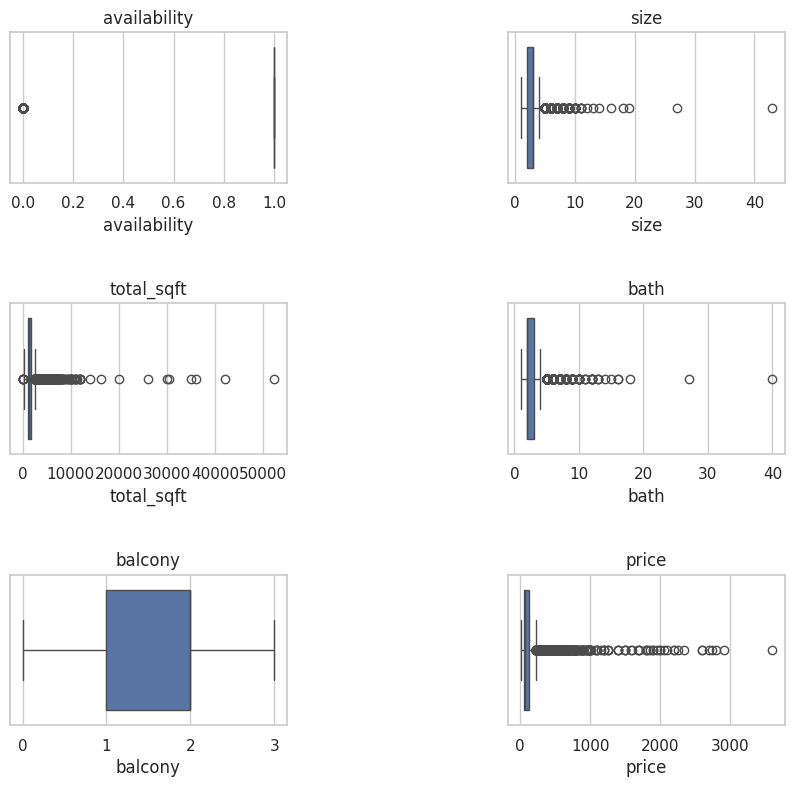

In [167]:
plt.figure(figsize=(10, 9))
for i, col in enumerate(num_cols[:]):
    plt.subplot(3, 2, i+1)
    plt.title(col)
    sns.boxplot(df[col], orient="h")
plt.subplots_adjust(wspace=.8, hspace=.8)
plt.show()

In [168]:
for col in num_cols[:]:
    Q1 = np.quantile(df[col], .25)
    Q3 = np.quantile(df[col], .75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    upper_outliers = df[df[col] > upper][col].values
    lower_outliers = df[df[col] < lower][col].values
    df[col].replace(upper_outliers, upper, inplace=True)
    df[col].replace(lower_outliers, lower, inplace=True)

In [169]:
print(df.duplicated().sum())


2245


In [170]:
df.drop_duplicates(keep="first", inplace=True)
print(df.duplicated().sum())


0


In [171]:
from sklearn.preprocessing import MinMaxScaler
cols_to_norm = df.select_dtypes("number").columns
scaler = MinMaxScaler()
df[cols_to_norm] = scaler.fit_transform(df[cols_to_norm])

In [172]:
df["area_type"].unique()

['Super built-up  Area', 'Plot  Area', 'Built-up  Area', 'Carpet  Area']
Categories (4, object): ['Built-up  Area', 'Carpet  Area', 'Plot  Area', 'Super built-up  Area']

In [173]:
label ={
    "area_type":{'Super built-up  Area':0 , 'Plot  Area':1 , 'Built-up  Area':2 , 'Carpet  Area':3 }
}

In [174]:
df.replace(label, inplace=True)


In [175]:
df["area_type"] = df["area_type"].astype("int")


In [176]:
df

,area_type,availability,size,total_sqft,bath,balcony,price
0,0,0.0,0.285714,0.355769,0.285714,0.333333,0.143180
1,1,0.0,0.857143,1.000000,1.000000,1.000000,0.516129
2,2,0.0,0.571429,0.523601,0.285714,1.000000,0.248848
3,0,0.0,0.571429,0.559003,0.571429,0.333333,0.400922
4,0,0.0,0.285714,0.418706,0.285714,0.333333,0.198157
...,...,...,...,...,...,...,...
13308,2,0.0,0.571429,0.561626,0.571429,0.333333,0.617512
13309,0,0.0,0.571429,0.626311,0.571429,0.666667,0.387696
13310,0,0.0,0.285714,0.353147,0.285714,0.666667,0.206037
13312,0,0.0,0.285714,0.445804,0.285714,0.666667,0.179724


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10955 entries, 0 to 13317
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     10955 non-null  int64  
 1   availability  10955 non-null  float64
 2   size          10955 non-null  float64
 3   total_sqft    10955 non-null  float64
 4   bath          10955 non-null  float64
 5   balcony       10955 non-null  float64
 6   price         10955 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 684.7 KB


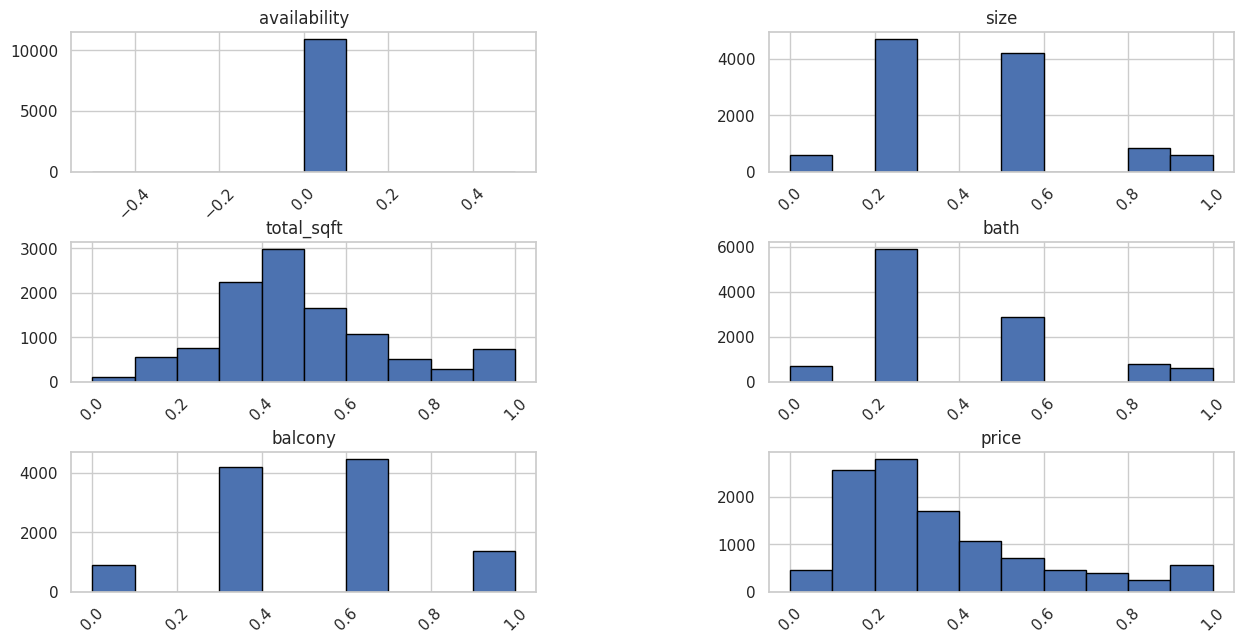

In [178]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(4, 2, i+1)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.hist(df[col],edgecolor="black")
plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

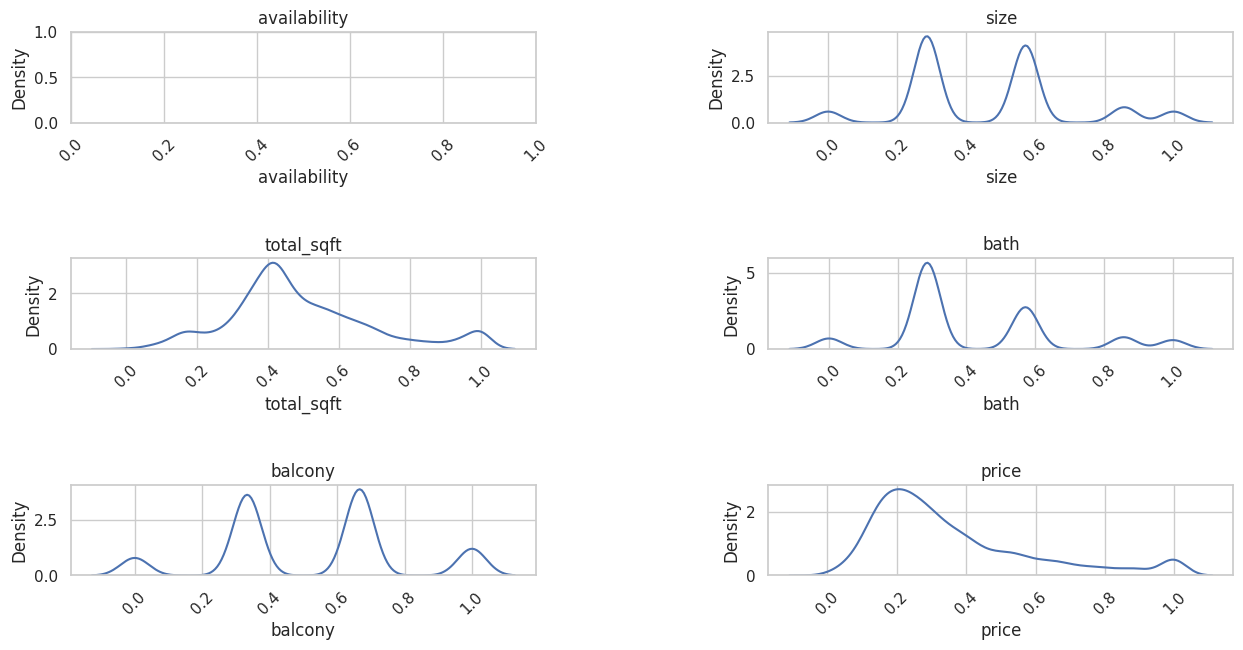

In [179]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(df[col])
    plt.title(col)
    plt.xticks(rotation=45)
plt.subplots_adjust(wspace=.5, hspace=1.5)
plt.show()

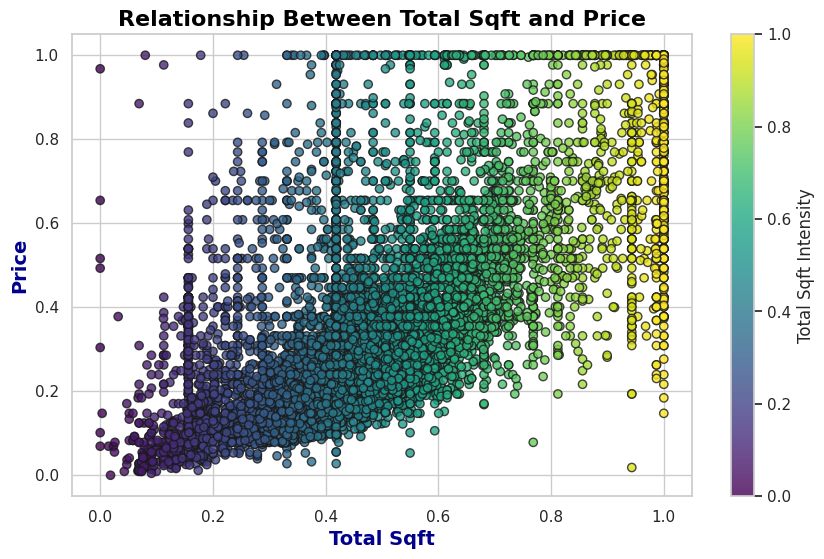

"\nplt.figure(figsize = (20, 25))\n  plt.scatter(df['total_sqft'], df['price'])\n  plt.xlabel(col)\n  plt.ylabel('price')\n  plt.title(col)\nplt.subplots_adjust(wspace=.5, hspace=1.5)\nplt.show()\n"

In [180]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df['total_sqft'], df['price'],
    c=df['total_sqft'], cmap='viridis', alpha=0.8, edgecolor='k'
)
plt.colorbar(scatter, label='Total Sqft Intensity')

plt.xlabel('Total Sqft', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Price', fontsize=14, fontweight='bold', color='darkblue')
plt.title('Relationship Between Total Sqft and Price', fontsize=16, fontweight='bold', color='black')
plt.show()

#OR
'''
plt.figure(figsize = (20, 25))
  plt.scatter(df['total_sqft'], df['price'])
  plt.xlabel(col)
  plt.ylabel('price')
  plt.title(col)
plt.subplots_adjust(wspace=.5, hspace=1.5)
plt.show()
'''

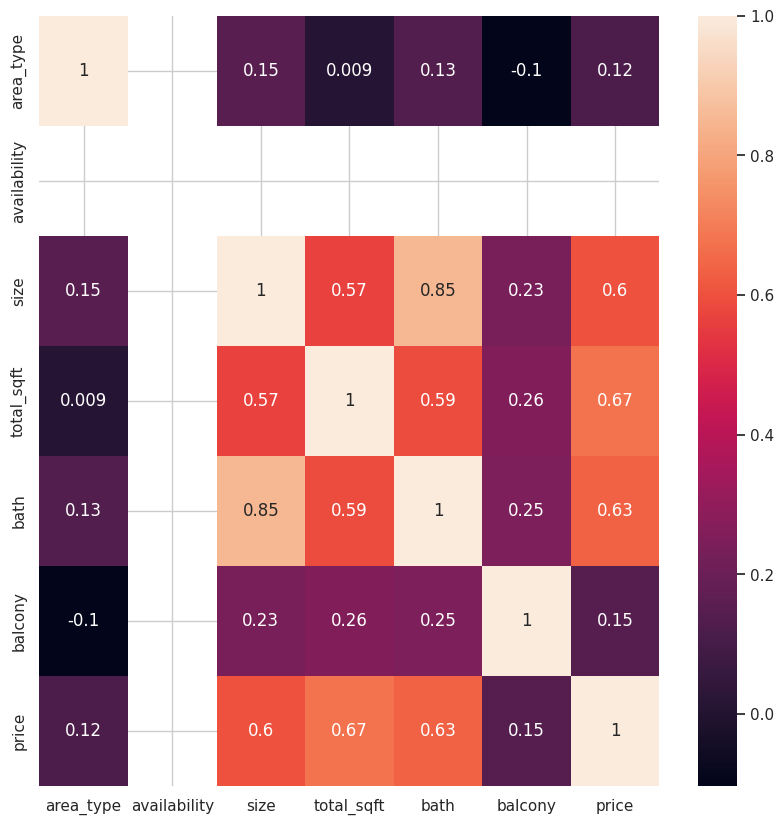

In [181]:
corr = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = True)
plt.show()


In [182]:
df.drop(["availability"], axis=1, inplace=True)


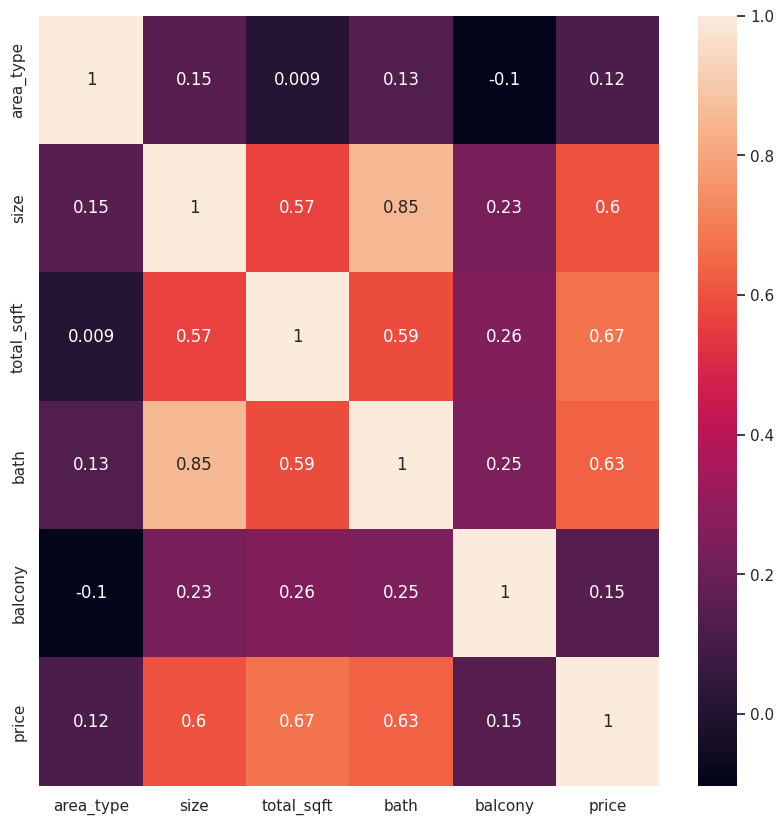

In [183]:
corr = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = True)
plt.show()

In [184]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [197]:
X = df.drop(columns=['price'])
y = df['price']

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [199]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    return mse, mae, rmse, mape, y_test, y_pred

In [200]:
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'KNN': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

In [201]:
param_grid_dt = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
param_grid_knn = {'n_neighbors': [3, 5, 7, 10]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 10]}
param_grid_xgb = {'n_estimators': [50, 100], 'learning_rate': [0.1, 0.05], 'max_depth': [3, 5, 7]}

grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_xgb = GridSearchCV(XGBRegressor(random_state=42), param_grid_xgb, cv=5, scoring='neg_mean_squared_error')

In [203]:
best_models = {
    'Decision Tree': grid_search_dt.fit(X_train, y_train).best_estimator_,
    'KNN': grid_search_knn.fit(X_train, y_train).best_estimator_,
    'Random Forest': grid_search_rf.fit(X_train, y_train).best_estimator_,
    'XGBoost': grid_search_xgb.fit(X_train, y_train).best_estimator_,
}
best_models['Linear Regression'] = models['Linear Regression']
best_models['Polynomial Regression'] = models['Polynomial Regression']

Best model based on MSE: XGBoost

Performance metrics:
- MSE: 0.018425
- MAE: 0.094940
- RMSE: 0.135737
- MAPE: 32.65%

All model results:
                Model      MSE      MAE     RMSE      MAPE
        Decision Tree 0.020746 0.100129 0.144036 34.128642
                  KNN 0.019614 0.096787 0.140051 32.908556
        Random Forest 0.018881 0.096222 0.137410 33.213057
              XGBoost 0.018425 0.094940 0.135737 32.650090
    Linear Regression 0.023799 0.112523 0.154268 38.659622
Polynomial Regression 0.023799 0.112523 0.154268 38.659622

Sample True Values:
[0.97695853 0.34101382 0.25806452 0.33179724 0.32258065]

Sample Predicted Values:
[0.8489138  0.20812528 0.31534183 0.48106036 0.2654281 ]


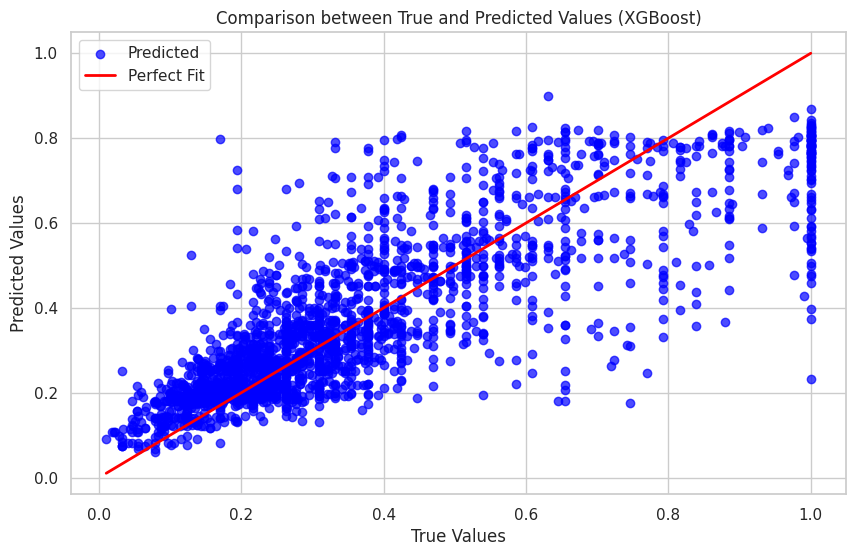

In [207]:
results = []

for model_name, model in best_models.items():
    mse, mae, rmse, mape, y_test_true, y_pred = evaluate_model(model, X_train, X_test, y_train, y_test)
    results.append({
        'Model': model_name,
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape,
        'True Values': y_test_true,
        'Predicted Values': y_pred
    })

results_df = pd.DataFrame(results)

best_model_index = results_df['MSE'].idxmin()
best_model = results_df.loc[best_model_index]

print(f"Best model based on MSE: {best_model['Model']}")
print("\nPerformance metrics:")
print(f"- MSE: {best_model['MSE']:.6f}")
print(f"- MAE: {best_model['MAE']:.6f}")
print(f"- RMSE: {best_model['RMSE']:.6f}")
print(f"- MAPE: {best_model['MAPE']:.2f}%")

print("\nAll model results:")
print(results_df[['Model', 'MSE', 'MAE', 'RMSE', 'MAPE']].to_string(index=False))

print("\nSample True Values:")
print(best_model['True Values'][:5].values)
print("\nSample Predicted Values:")
print(best_model['Predicted Values'][:5])

plt.figure(figsize=(10, 6))
plt.scatter(best_model['True Values'], best_model['Predicted Values'], color='blue', alpha=0.7, label='Predicted')
plt.plot([best_model['True Values'].min(), best_model['True Values'].max()],
         [best_model['True Values'].min(), best_model['True Values'].max()],
         color='red', linewidth=2, label='Perfect Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f"Comparison between True and Predicted Values ({best_model['Model']})")
plt.legend()
plt.grid(True)
plt.show()
